# Problem Set 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from functions import gini


from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

ModuleNotFoundError: No module named 'functions'

#### Question 1

**Part a**

In [ ]:
np.random.seed(68) 
x2 = np.random.normal(0, 1, 100)

In [ ]:
T=10000
N=100  #Sample size

# Parameters from the equation
beta_0 = 2   
beta_1 = 0.5


# Generate data
x2 = np.random.normal(0, 1, N)
error = np.random.normal(0, 5, N)
y = 2 + 0.5*x2 + error  

# Prepare the regressor matrix with intercept
X = sm.add_constant(x2)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

**Part b**

In [ ]:

sd = 5
beta_est = np.empty((T, 2))

for t in range(T):
    x = np.random.normal(0, 1, N)      #explanatory variable
    e = np.random.normal(0, sd, N)  #error term
    y = beta_0 + beta_1 * x + e

    
    X = sm.add_constant(x)               # design matrix [1, x], so it contains all explanatory variables
    res = sm.OLS(y, X).fit()             # OLS estimate
    beta_est[t, :] = res.params          # stores the estimates of each regression

print(beta_est[:5])
    


In [ ]:
print(res.params)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# beta_1 distribution diagram

xvals0 = np.linspace(beta_est[:,0].min(), beta_est[:,0].max(), 200)
axs[0].hist(beta_est[:,0], bins=50, density=True, alpha=0.6, color='lightblue', label='Simulated BY MC')
axs[0].plot(xvals0, norm.pdf(xvals0, loc=beta_0, scale=np.sqrt(var_beta[0])), 'r', lw=2, label='Normal approx')
axs[0].axvline(mean_beta[0], color='blue', lw=2, label='Mean')
axs[0].set_title("Distribution of estimated intercept")
axs[0].set_xlabel("Estimated Intercept")
axs[0].set_ylabel("Density")
axs[0].legend()


# beta_1 distribution diagram

xvals1 = np.linspace(beta_est[:,1].min(), beta_est[:,1].max(), 200)
axs[1].hist(beta_est[:,1], bins=50, density=True, alpha=0.6, color='lightgreen', label='Simulated by MC')
axs[1].plot(xvals1, norm.pdf(xvals1, loc=beta_1, scale=np.sqrt(var_beta[1])), 'r', lw=2, label='Normal approx')
axs[1].axvline(mean_beta[1], color='blue', lw=2, label='Mean')
axs[1].set_title("Distribution of estimated slope")
axs[1].set_xlabel("Estimated Slope")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
mean_beta = beta_est.mean(axis=0)  # axis=0 ensures that 
var_beta = beta_est.var(axis=0, ddof=1) # degress of freedom = 1 because we are using a sample

print(f"Mean of estimated betas: intercept {mean_beta[0]:.4f}, slope {mean_beta[1]:.4f}")
print(f"Variance of estimated betas: {var_beta[0]:.4f} {var_beta[0]:.4f}")

The distributions shown are normal distributions. The mean and variance of the estimated parameters are as follows:

| |E(βˆOLS) | Var(βˆOLS) |
|--------|-----|----------|
|Intercept| 1.9990 | 0.2533 |
|Slope | 0.49554 | 0.2533 |

**Part c**

In [ ]:
N=1000  # New sample size

# Parameters from the equation
beta_0 = 2   
beta_1 = 0.5

# Generate data
x2 = np.random.normal(0, 1, N)
error = np.random.normal(0, 5, N)
y = 2 + 0.5*x2 + error  

# Prepare the regressor matrix with intercept
X = sm.add_constant(x2)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

As N grows the estimates for the intercept and the slope get closer to 2 and 0.5. If rounded to 1 decimal point they would be correct for N=1000 but this is not the case for N=100. The standard errors for each variable are also a lot lower 

-------------------------Show formula of the distribution of the est betas--------------------------

#### Question 2

**Part a**

[ 0.          0.23641881  0.41893222  0.57925638  0.31705139  0.08595563
 -0.01453754  0.12907489 -0.00487031 -0.12531417 -0.29235626 -0.30733215
  0.04178085  0.31617953  0.38355051  0.56858121  0.47521805  0.64948185
  0.97568396  0.96940501  0.93980364  1.30957681  0.68873216  0.52211909
  0.28694556  0.15131591  0.1897985   0.37781835  0.50692666  0.82567086
  0.77316768  0.73560837  1.07368761  1.017099    1.28113358  1.17779758
  1.26103408  0.99346053  0.93817251  0.92305814  1.10246422  0.73666047
  0.94755795  0.27716356 -0.08989584 -0.00851815  0.129639   -0.07379843
 -0.12693045  0.01304019]


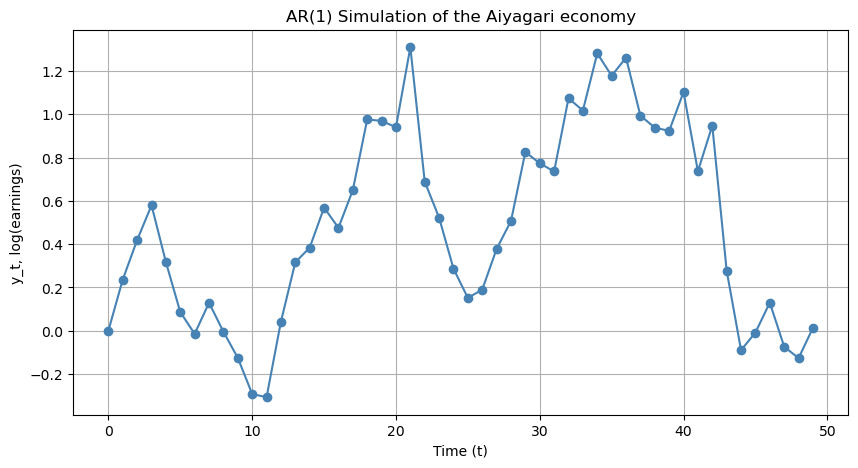

In [72]:
T=50
def ar_1_sim(T,rho,a=0, sd_e=0.25):
    ''' 
    simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,25)
    '''
    y = np.empty((T))
    y[0] = 0
    for i in range(1,T):
        e = np.random.normal(0,sd_e) 
        y[i] = a + rho*y[i-1] + e
      
    return y



y = ar_1_sim(T, rho=0.95)
print(y)

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(0, T), y, marker='o', linestyle='-', color='steelblue')
plt.title('AR(1) Simulation of the Aiyagari economy')
plt.xlabel('Time (t)')
plt.ylabel('y_t, log(earnings)')
plt.grid(True)
plt.show()

**Part b**

In [73]:
def ar_sim_n(mu = 0, sd = 0.25, rho = 0.95, T=T, N=N, a=0):
    
    y = np.empty((N, T))  # (N, T+1)
    y[:, 0] = 0
    
    for i in range (1, T):   # can i also do (1,T)
        eps = np.random.normal(mu, sd, N)  # 1 is the dimension of eps, which is dependent on dimension of y
        y[:, i] = a + rho*y[:, i-1]+ eps
   
    return y 


**Par c**

In [74]:
# Calling on the funtion just made in part b
N=5

y = ar_sim_n(mu, sd, rho, T=50, N=N)
print(y[:2, :5])
print(y.shape)

[[  0.          -1.4575779   -5.3888486    0.6429085   -1.65239971]
 [  0.         -10.30279149  -5.59070188  -1.97631312  -2.89590609]]
(5, 50)


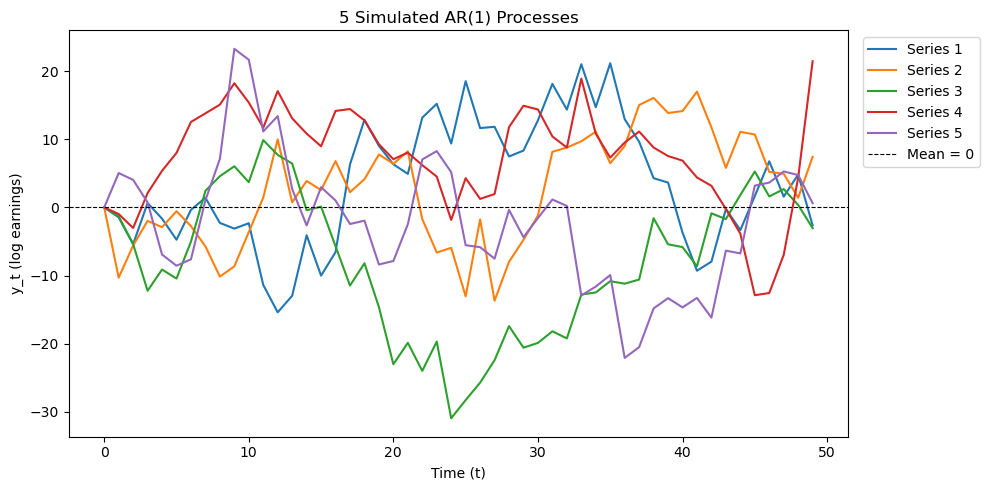

In [75]:
# Plot the 5 AR(1) processes
plt.figure(figsize=(10,5))
for i in range(N):
    plt.plot(range(T), y[i, :], label=f"Series {i+1}")
plt.title(f"{N} Simulated AR(1) Processes")
plt.xlabel("Time (t)")
plt.ylabel("y_t (log earnings)")
plt.axhline(0, color='k', lw=0.8, linestyle='--', label="Mean = 0")
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.show()

<u>Stationary mean:<u>

#### $E[y_t] = \frac{a}{1 - \rho}$

If $(a = 0)$, like in this case, then:

#### $E[y_t] = 0 $

-------------------

<u>Stationary variance:<u>

#### $Var(y_t) = \frac{\sigma_\varepsilon^2}{1 - \rho^2}$

If $sigma_\varepsilon = 0.25$ and $rho = 0.95$, then:

#### $Var(y_t) = \frac{0.25^2}{1 - 0.95^2} \approx 0.641$

In [76]:
sample_mean = y.mean()
print(f"Sample mean of y_t = {sample_mean: 0.3f}")

sample_var = y.var()
print(f"Sample variance of y_t = {sample_var: 0.3f}")

Sample mean of y_t =  0.673
Sample variance of y_t =  106.664


Sample mean of $y_t = -9.489 $ 

Sample variance of $y_t =  162.378$

**Part d**

In [82]:
N = 10000
T = 1000

y = ar_sim_n(mu, sd, rho, T=1000, N=10000)

y_last = y[:, -1]
print(y_last)
y.shape


earnings = np.exp(y_last)

[ -2.76031895  17.64685368  15.78380969 ... -13.55738244 -22.27937567
   4.8792497 ]


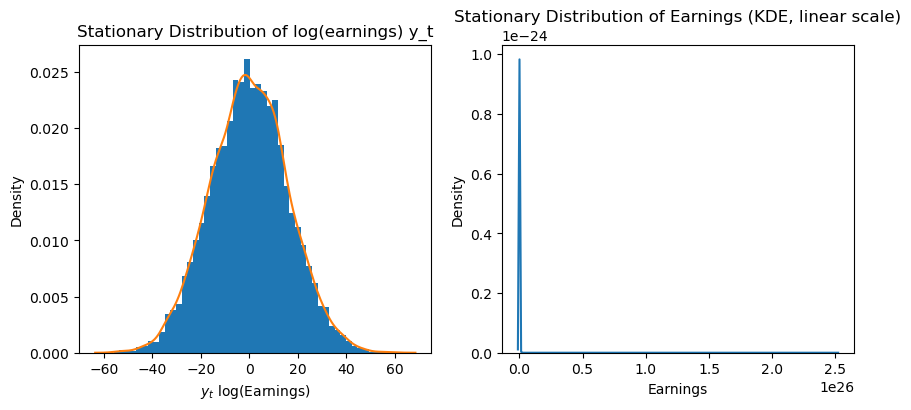

In [97]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(y_last, bins=50, density=True)
plt.title("Stationary Distribution of log(earnings) y_t")

sns.kdeplot(y_last)
plt.title("Stationary Distribution of log(earnings) y_t")
plt.xlabel("$y_t$ log(Earnings)")
plt.ylabel("Density")



plt.subplot(1,2,2)
sns.kdeplot(earnings, log_scale=False)
plt.title("Stationary Distribution of Earnings (KDE, linear scale)")
plt.xlabel("Earnings")
plt.ylabel("Density")

plt.show()



**Part e**

**Part f**

#### Question 3

**Part a**

**Part b**

#### Question 4

**Part a**

In [106]:
mu = 7.5
sd = 0.8
N = 100000

np.random.seed(42)
y = np.random.lognormal(mu, sd, N)

def gini(x):
    x = np.sort(x)
    n = x.size
    cumx = x.cumsum()
    return (2.0 * np.sum((np.arange(1, n+1) * x))) / (n * cumx[-1]) - (n + 1.0) / n




0.42853303403946374


In [107]:
print(y.mean())
print(y.var())
print(gini(y))

2492.369466328804
5524925.046213265
0.42853303403946374


----------------------------------Nice table with mean var and gini results----------------

**Part b**

In [118]:
c = y**0.8 + 0.5*y + 500
c[:5]

array([2399.50655901, 1678.62166563, 2628.42742375, 4626.54532738,
       1596.87643119])

In [119]:
print(c.mean())
print(c.var())
print(gini(c))

2241.7159034270967
2326355.396965417
0.31544430794637424


------------------------------------Another nice table incoming----------------------------

**Part c**

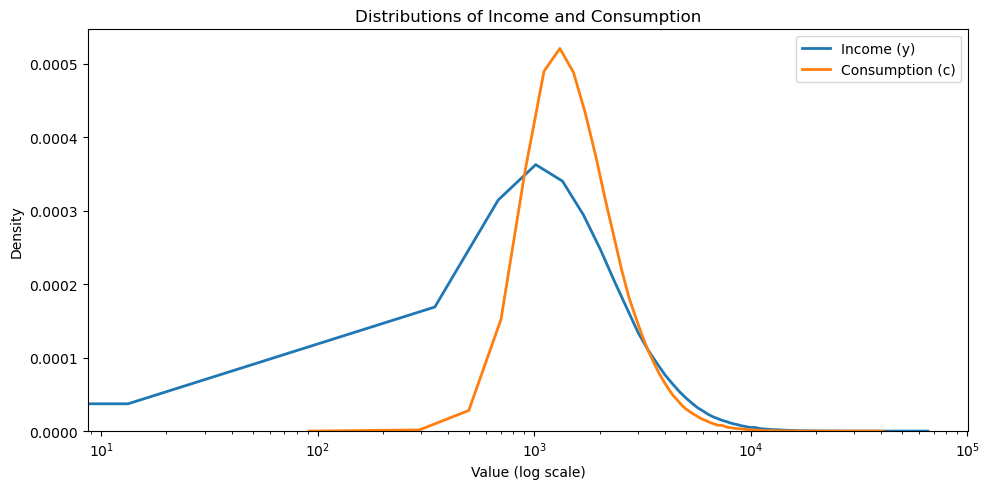

In [128]:
plt.figure(figsize=(10,5))
sns.kdeplot(y, label='Income (y)', linewidth=2)
sns.kdeplot(c, label='Consumption (c)', linewidth=2)
plt.xscale('log')  # use log scale for better visualization of right tail
plt.xlabel("Value (log scale)")
plt.ylabel("Density")
plt.title("Distributions of Income and Consumption")
plt.legend()
plt.tight_layout()
plt.show()